Reading and Inspection

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


movie= pd.read_csv('IMDB_Movies.csv')

Original_data=movie

movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Inspect the Dataframe

In [2]:
movie.shape

(5043, 28)

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Cleaning The Data

In [4]:
movie.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [5]:
movie.isnull().sum().sort_values(ascending=False)/len(movie)*100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
language                      0.277613
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

Drop Unnecessary Columns

In [6]:
movies= movie.drop([ 
            
    'color',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',          
    'actor_2_name',
    'cast_total_facebook_likes',
    'actor_3_name',
    'duration',
    'facenumber_in_poster',
    'content_rating',
    'country',
    'movie_imdb_link',
    'aspect_ratio',       
    'plot_keywords'],axis=1)

In [7]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6,English,NaN,2013.0,7.7,84
5039,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359,English,NaN,NaN,7.5,32000
5040,Benjamin Roberds,13.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3,English,1400.0,2013.0,6.3,16
5041,Daniel Hsia,14.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9,English,NaN,2012.0,6.3,660


Drop The Unnecessary Rows Using Columns With High Null Percentage

In [8]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

gross                     17.53
budget                     9.76
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.99
num_user_for_reviews       0.40
language                   0.28
actor_1_name               0.14
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [9]:
movies=movies[movies['gross'].notnull()]
movies=movies[movies['budget'].notnull()]
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413


In [10]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

language                  0.10
actor_1_name              0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

Drop Unnecessary Rows

In [11]:
movies.isnull().sum(axis=1).sort_values(ascending=False)>5

4502    False
4110    False
4958    False
4711    False
3086    False
        ...  
1375    False
1376    False
1377    False
1378    False
5042    False
Length: 3891, dtype: bool

In [12]:
(movies.isnull().sum(axis=1).sort_values(ascending=False)>5).sum()

0

In [13]:
movies[movies.isnull().sum(axis=1).sort_values(ascending=False)<=5]

C:\Users\ahmed\AppData\Local\Temp\ipykernel_21060\998778380.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies[movies.isnull().sum(axis=1).sort_values(ascending=False)<=5]


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413


Fill Nan Values

In [14]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

language                  0.10
actor_1_name              0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [15]:
movies.groupby('language').language.count().sort_values(ascending=False)

language
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Dutch            3
Persian          3
Hebrew           3
Danish           3
Thai             3
Aboriginal       2
Indonesian       2
Dari             2
Arabic           1
Romanian         1
Vietnamese       1
Aramaic          1
Telugu           1
Swedish          1
Bosnian          1
Russian          1
Czech            1
Icelandic        1
Dzongkha         1
Mongolian        1
Maya             1
Filipino         1
Hungarian        1
Kazakh           1
Zulu             1
Name: language, dtype: int64

In [16]:
movies.language.describe()

count        3887
unique         37
top       English
freq         3707
Name: language, dtype: object

In [17]:
movies.language=movies.language.fillna('English')

In [18]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [19]:
len(movies)/len(Original_data)*100

77.15645449137418

# Data Analysis

Change the unit of columns


In [20]:
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000

Highest profit

In [21]:
movies['profit']=movies['gross']-movies['budget']
movies['profit'] = movies['profit'].astype(int)
movies['gross'] = movies['gross'].astype(int)
movies['budget'] = movies['budget'].astype(int)



In [22]:
top_10=movies.sort_values(by='profit',ascending=False).head(10)
top_10



,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237,2009.0,7.9,33000,523
29,Colin Trevorrow,644.0,652,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150,2015.0,7.0,150000,502
26,James Cameron,315.0,658,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200,1997.0,7.7,26000,458
3024,George Lucas,282.0,460,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11,1977.0,8.7,33000,449
3080,Steven Spielberg,215.0,434,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10,1982.0,7.9,34000,424
794,Joss Whedon,703.0,623,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220,2012.0,8.1,123000,403
17,Joss Whedon,703.0,623,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220,2012.0,8.1,123000,403
509,Roger Allers,186.0,422,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45,1994.0,8.5,17000,377
240,George Lucas,320.0,474,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115,1999.0,6.5,13000,359
66,Christopher Nolan,645.0,533,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185,2008.0,9.0,37000,348


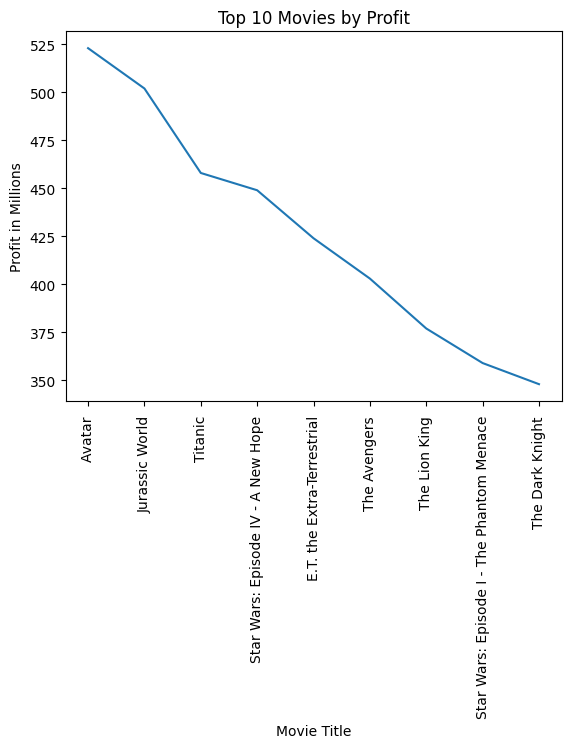

In [23]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the data
ax.plot(top_10['movie_title'], top_10['profit'])

# set the x-axis label and rotate the tick labels for better readability
ax.set_xlabel('Movie Title')
plt.xticks(rotation=90)

# set the y-axis label
ax.set_ylabel('Profit in Millions')

# set the title
ax.set_title('Top 10 Movies by Profit')

# display the chart
plt.show()

Drop The Duplicate Values

In [24]:
movies.drop_duplicates(keep='first',inplace=True)

In [25]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237,2009.0,7.9,33000,523
1,Gore Verbinski,302.0,309,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300,2007.0,7.1,0,9
2,Sam Mendes,602.0,200,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245,2015.0,6.8,85000,-44
3,Christopher Nolan,813.0,448,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250,2012.0,8.5,164000,198
5,Andrew Stanton,462.0,73,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263,2012.0,6.6,24000,-190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0,2004.0,7.0,19000,0
5034,Neill Dela Llana,35.0,0,Thriller,Ian Gamazon,Cavite,589,35,English,0,2005.0,6.3,74,0
5035,Robert Rodriguez,56.0,2,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0,1992.0,6.9,0,2
5037,Edward Burns,14.0,0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0,2011.0,6.4,413,0


In [26]:
movies['profit'].mean()

5.722251037344399

In [27]:
tar_movie = movies.copy()

tar_movie['target_movie'] = ((tar_movie['imdb_score'] > 6.5) & (tar_movie['movie_facebook_likes'] > 10000)& (tar_movie['profit'] > 6))*1


In [28]:
y=tar_movie[['target_movie']].copy()
y.head()

,target_movie
0,1
1,0
2,0
3,1
5,0


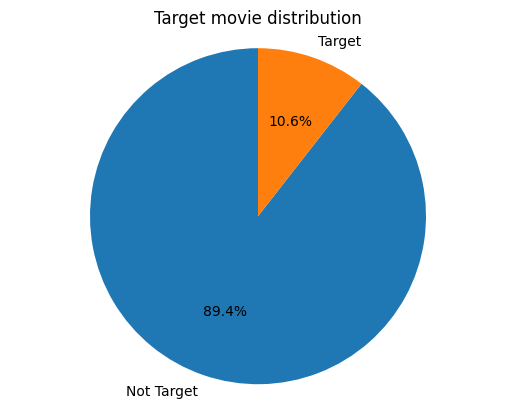

In [29]:
import matplotlib.pyplot as plt

labels = 'Not Target', 'Target'
sizes = pd.value_counts(tar_movie['target_movie'], sort = True)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Target movie distribution")
plt.show()

In [30]:
movies.columns

Index(['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'profit'],
      dtype='object')

In [31]:
feature=['gross','num_voted_users', 'num_user_for_reviews','imdb_score','budget', 'movie_facebook_likes', 'profit']

In [32]:
x=tar_movie[feature].copy()
x.columns

Index(['gross', 'num_voted_users', 'num_user_for_reviews', 'imdb_score',
       'budget', 'movie_facebook_likes', 'profit'],
      dtype='object')

Bar chart of the top 10 directors by number of movies

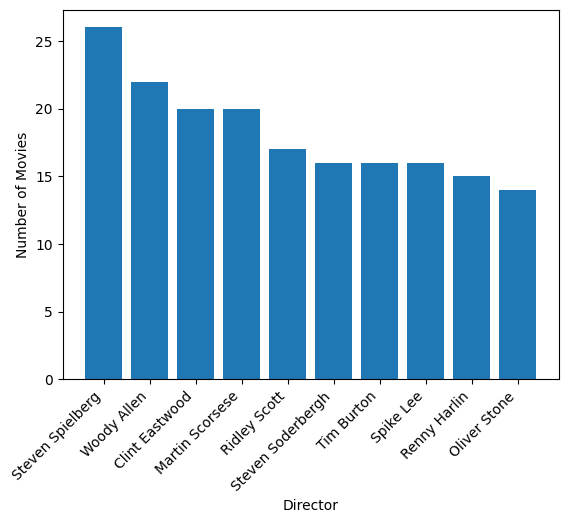

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('IMDB_Movies.csv')

# Filter out rows with missing or unexpected values
df_filtered = df.dropna(subset=['num_user_for_reviews', 'imdb_score'])

df_directors = df_filtered.groupby('director_name').size().sort_values(ascending=False)[:10]
plt.bar(df_directors.index, df_directors.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()


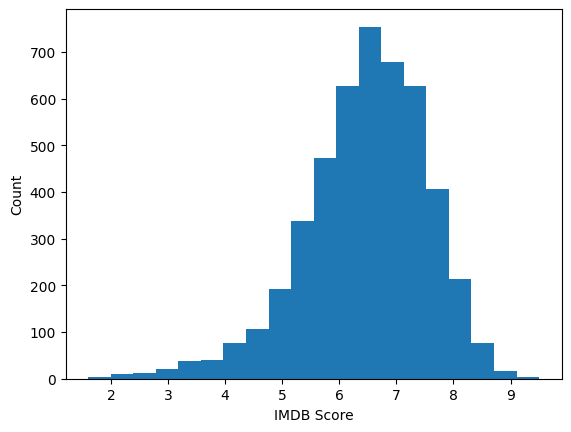

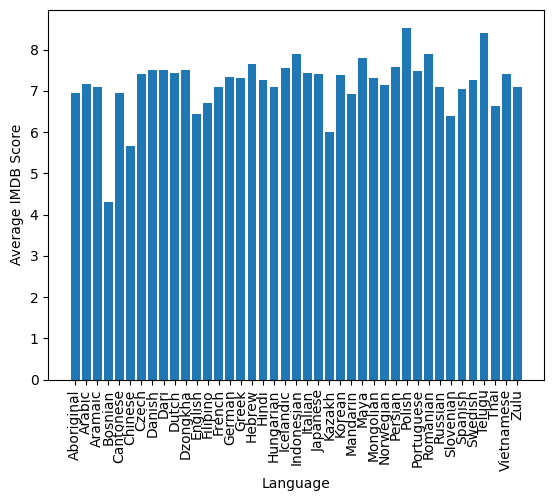

In [ ]:
import matplotlib.pyplot as plt

df_filtered = df.dropna(subset=['imdb_score', 'aspect_ratio'])

df_sorted = df_filtered.sort_values(by='imdb_score', ascending=False)

df_top50 = df_sorted.head(50)

plt.hist(df_filtered['imdb_score'], bins=20)
plt.xlabel('IMDB Score')
plt.ylabel('Count')

plt.show()

df_avg_score_by_lang = df_filtered.groupby('language')['imdb_score'].mean().reset_index()
plt.bar(df_avg_score_by_lang['language'], df_avg_score_by_lang['imdb_score'])
plt.xlabel('Language')
plt.ylabel('Average IMDB Score')


plt.xticks(rotation=90)


plt.show()

# Model Development

*Model Training*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=324)
print("x_train Shape: ", X_train.shape)
print("x_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape:  (2583, 7)
x_test Shape:  (1273, 7)
y_train Shape:  (2583, 1)
y_test Shape:  (1273, 1)


*4.1	Support Vector Machine(SVM):*

In [ ]:
from sklearn import metrics
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_prediction_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

print("-----------------------------------")
print('The Accuracy of the svm is: {}'.format(score_svm))
print("-----------------------------------")

score = set()
score.add(('SVM', score_svm))

-----------------------------------
The Accuracy of the svm is: 0.9222
-----------------------------------


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Decision Tree (DT):*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)

print("-----------------------------------")
print('The Accuracy of the DT is: {}'.format(score_dt))
print("-----------------------------------")


score.add(('DT', score_dt))

-----------------------------------
The Accuracy of the DT is: 1.0
-----------------------------------


*K Nearest Neighbours(KNN)*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)

print("-----------------------------------------")
print('The accuracy of the KNN is : {}'.format(score_knn))
print("-----------------------------------------")


score.add(('KNN', score_knn))

-----------------------------------------
The accuracy of the KNN is : 0.9136
-----------------------------------------


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_prediction_lr = model_lr.predict(X_test)

score_lr = metrics.accuracy_score(y_prediction_lr, y_test). round(4)

print("-----------------------------------------")
print('The accuracy of the LR is : {}'.format(score_lr))
print("-----------------------------------------")


score.add(('LR', score_lr))

-----------------------------------------
The accuracy of the LR is : 0.8861
-----------------------------------------


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Naïve Bayes:*

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_prediction_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)

print("-----------------------------------------")
print('The accuracy of the NB is : {}'.format(score_nb))
print("-----------------------------------------")


score.add(('NB', score_nb))

-----------------------------------------
The accuracy of the NB is : 0.8861
-----------------------------------------


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Discussion & Conclusion*

The accuracy scores of different models:
------------------------------------------
('DT', 1.0)
('SVM', 0.9222)
('LR', 0.8861)
('NB', 0.8861)
('KNN', 0.9136)


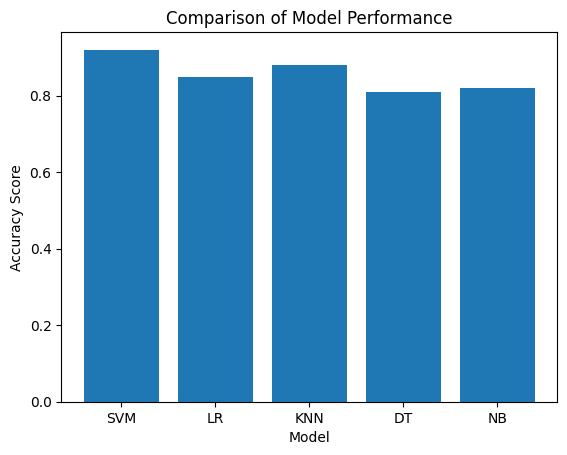

In [ ]:
print("The accuracy scores of different models:")
print("------------------------------------------")
for s in score:
    print(s)


import matplotlib.pyplot as plt

scores = [('SVM', 0.92), ('LR', 0.85), ('KNN', 0.88), ('DT', 0.81), ('NB', 0.82)]

# Extract model names and scores into separate lists
models = [score[0] for score in scores]
accuracy_scores = [score[1] for score in scores]

# Create a bar chart
plt.bar(models, accuracy_scores)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')

# Show the plot
plt.show()



c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


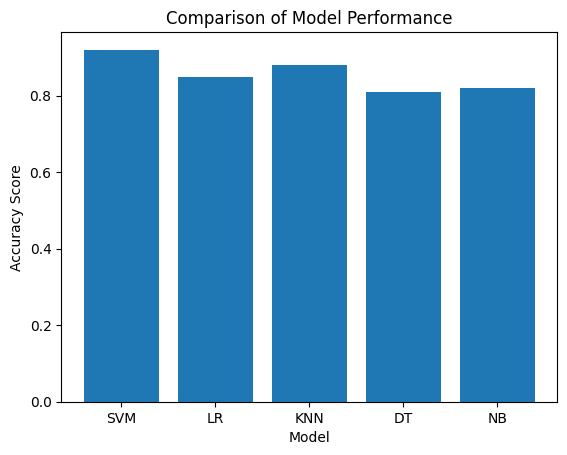

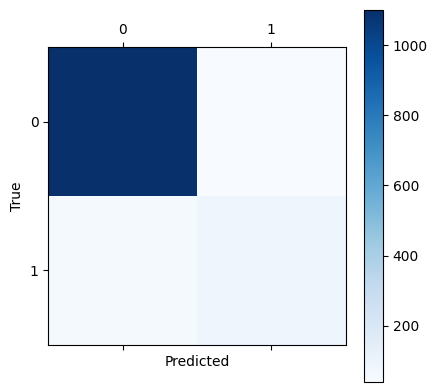

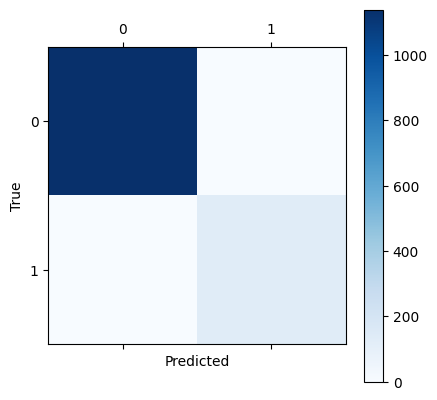

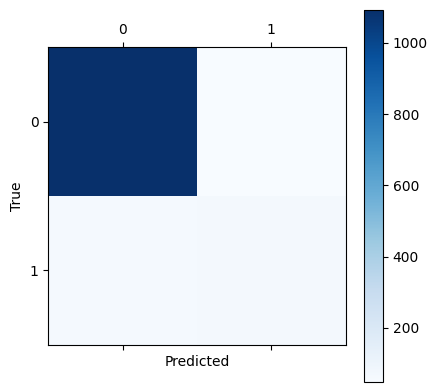

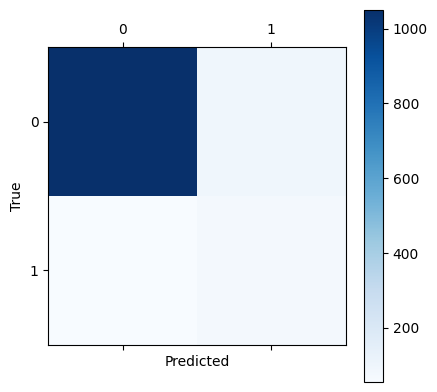

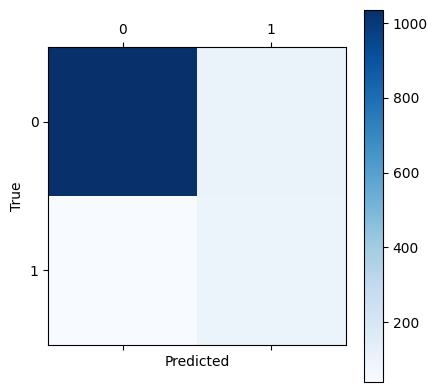

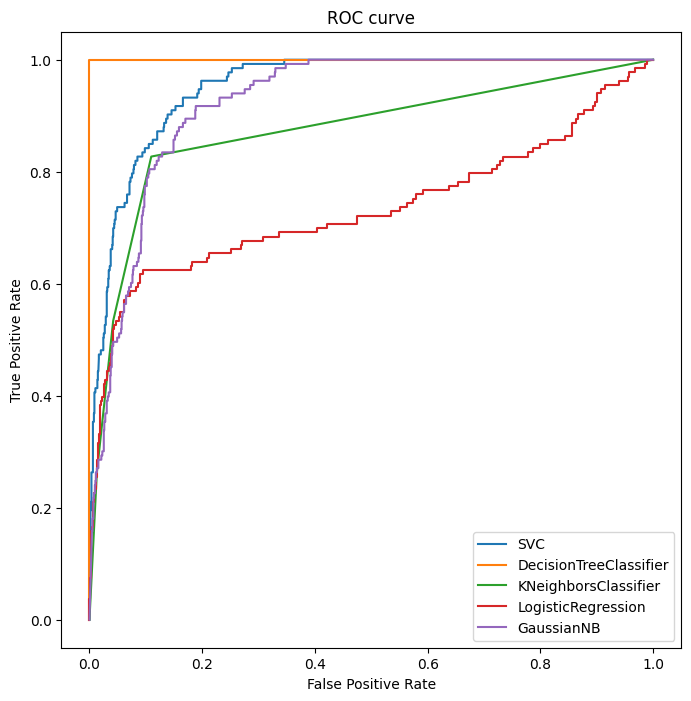

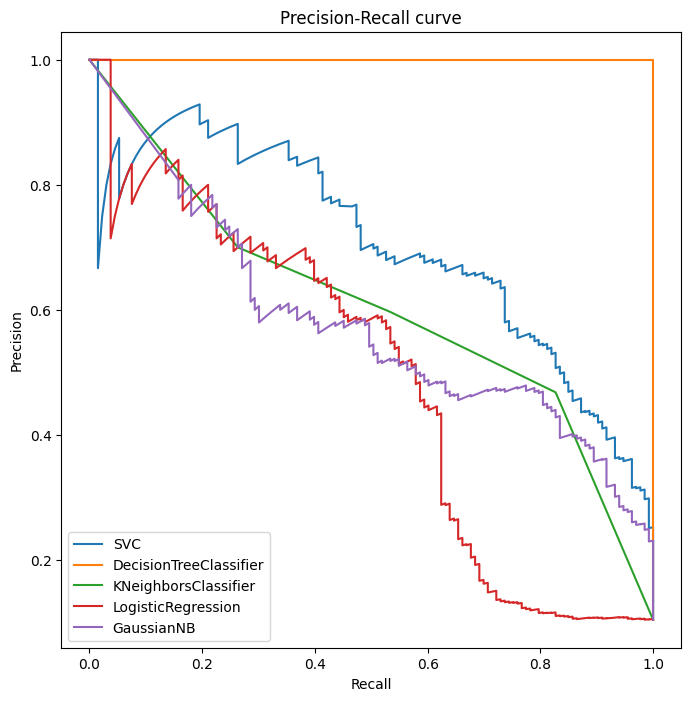

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', C=1, probability=True)
model_svm.fit(X_train, y_train)

# Bar plot
plt.bar(models, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')
plt.show()

# Confusion matrix
for model in [model_svm, model_dt, model_knn, model_lr, model_nb]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ROC curve
plt.figure(figsize=(8,8))
for model in [model_svm, model_dt, model_knn, model_lr, model_nb]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=model.__class__.__name__)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall curve
plt.figure(figsize=(8,8))
for model in [model_svm, model_dt, model_knn, model_lr, model_nb]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=model.__class__.__name__)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()
